## NEK NASLOV, 
** KRATEK OPIS

### 1. PRIKAZ ZVEZNIH DRŽAV NA MAPI, GLEDE NA KATEGORIJO LEGALIZACIJO
Kategorija legalizacije:
- **V celoti legalizirane**: To so zvezne države, kjer je uporaba, posedovanje in prodaja konoplje povsem legalna pod določenimi pogoji. 
- **Rekreacijsko legalizirane**: V teh zveznih državah je uporaba konoplje legalna za rekreacijske namene, kar pomeni, da ljudje lahko zakonito uživajo te substance brez medicinskega ali terapevtskega razloga. 
- **Medicinsko legalizirane**: Zvezne države v tej kategoriji dovoljujejo uporabo konoplje izključno za medicinske in terapevtske namene pod nadzorom zdravstvenih strokovnjakov.
- **Ni legalizirana**: V teh zveznih državah so določene substance popolnoma prepovedane in so kaznovane z zakonodajo, ki se razlikuje od zvezne države do zvezne države.ržave.

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [6]:
legalization_excel = r"podatki/legalization.csv"

df = pd.read_csv(legalization_excel)

legalization_dict = {
    "legalizirana": [],
    "legalizirana_rec": [],
    "legalizirana_med": [],
    "ni_legalizirana": []
}


for index, row in df.iterrows():
    state = row['State']
    code = row['Code']
    rec = row['Recreational']
    med = row['Medical']
    
    # Determine the category and append the row to the corresponding list
    if rec == "Yes" and med == "Yes":
        legalization_dict["legalizirana"].append([state, code, rec, med])
    elif rec == "Yes" and med != "Yes":
        legalization_dict["legalizirana_rec"].append([state, code, rec, med])
    elif rec != "Yes" and med == "Yes":
        legalization_dict["legalizirana_med"].append([state, code, rec, med])
    else:
        legalization_dict["ni_legalizirana"].append([state, code, rec, med])
        
#for category, rows in legalization_dict.items():
 #   print(category + ":")
  #  for row in rows:
   #     print(row)
    #print()


Število držav z legalizirano rekreativno konopljo: 0
Število držav z legalizirano medicinsko konopljo: 16
Število držav v celoti legalizirano konopljo: 24
Število držav, ki nima legalizirane konoplje: 10


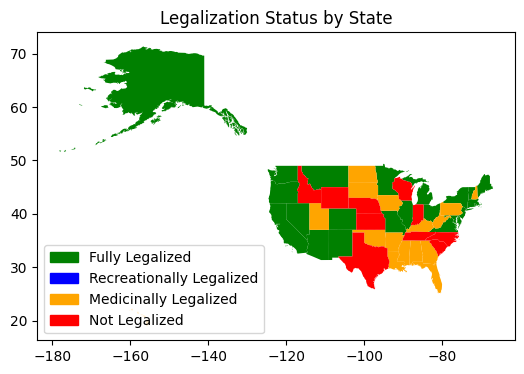

In [7]:
# shapefile containing the geometry of the US states
us_map = gpd.read_file(r"C:\Users\Uporabnik\Downloads\States_shapefile-shp\States_shapefile.shp")
colors = {'legalizirana': 'green', 'legalizirana_rec': 'blue', 'legalizirana_med': 'orange', 'ni_legalizirana': 'red'}

#print(us_map.columns)
# Mapa
fig, ax = plt.subplots(figsize=(30, 4))

print("Število držav z legalizirano rekreativno konopljo:", len(legalization_dict["legalizirana_rec"]))
print("Število držav z legalizirano medicinsko konopljo:", len(legalization_dict["legalizirana_med"]))
print("Število držav v celoti legalizirano konopljo:", len(legalization_dict["legalizirana"]))
print("Število držav, ki nima legalizirane konoplje:", len(legalization_dict["ni_legalizirana"]))

# PlotTING each category with a different color
for category, state_list in legalization_dict.items():
    for state_info in state_list:
        state_name = state_info[0].upper()   # Get state name from the state_info list
        if state_name not in us_map['State_Name'].values:
            print(f"{state_name} not found in the map")
            print(us_map['State_Name'])
        else:
            us_map[us_map['State_Name'] == state_name].plot(ax=ax, color=colors[category])

# legend
legend_labels = {'legalizirana': 'Fully Legalized', 'legalizirana_rec': 'Recreationally Legalized', 
                 'legalizirana_med': 'Medicinally Legalized', 'ni_legalizirana': 'Not Legalized'}
handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in legalization_dict.keys()]
ax.legend(handles, legend_labels.values(), loc='lower left')

# Set plot title
ax.set_title('Legalization Status by State')

# Show the map
plt.show()


### PRIKAZ ŠTEVILA BREZDOMCEV GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

In [16]:
population_file = r"podatki/population.csv"
df_population = pd.read_csv(population_file)
for index_population, row_population in df_population.iterrows():
    year_population = row_population["Year"]
    state_population = row_population["Code"]
    value_population = row_population["Value"]
    print()
    value_population = float(value_population.replace(",", "").replace(".",""))
    print(year_population, state_population, value_population)


2022 AL 5073903.0

2022 AK 733276.0

2022 AZ 7365684.0

2022 AR 3046404.0

2022 CA 39040616.0

2022 CO 5841039.0

2022 CT 3608706.0

2022 DE 1019459.0

2022 FL 22245521.0

2022 GA 10913150.0

2022 HI 1439399.0

2022 ID 1938996.0

2022 IL 12582515.0

2022 IN 6832274.0

2022 IA 3199693.0

2022 KS 2936716.0

2022 KY 4511563.0

2022 LA 4588023.0

2022 ME 1389338.0

2022 MD 6163981.0

2022 MA 6982740.0

2022 MI 10033281.0

2022 MN 5714300.0

2022 MS 2938928.0

2022 MO 6177168.0

2022 MT 1122878.0

2022 NE 1968060.0

2022 NV 3177421.0

2022 NH 1399003.0

2022 NJ 9260817.0

2022 NM 2113476.0

2022 NY 19673200.0

2022 NC 10695965.0

2022 ND 778912.0

2022 OH 11759697.0

2022 OK 4019271.0

2022 OR 4239379.0

2022 PA 12972091.0

2022 RI 1093842.0

2022 SC 5282955.0

2022 SD 909869.0

2022 TN 7048976.0

2022 TX 30029848.0

2022 UT 3381236.0

2022 VT 647110.0

2022 VA 8679099.0

2022 WA 7784477.0

2022 WV 1774035.0

2022 WI 5890543.0

2022 WY 581629.0

2021 AL 5050380.0

2021 AK 734923.0

2021 AZ

In [18]:
def populacija(state_code, year):
    population_file = r"podatki/population.csv"
    df_population = pd.read_csv(population_file)
    for index_population, row_population in df_population.iterrows():
        year_population = row_population["Year"]
        state_population = row_population["Code"]
        value_population = row_population["Value"]
        if state_code == state_population and year_population == year:
            # Spremeni niz v število in odstrani vejico
            value_population = float(value_population.replace(",", "").replace(".",""))
            return value_population
    return None


In [32]:
import pandas as pd

excel_file_homelessness = r"podatki\homelessness.csv"
df_homeless = pd.read_csv(excel_file_homelessness)

# UREJANJE
dict_homeless = {}

for index_homeless, row_homeless in df_homeless.iterrows():
    year = row_homeless["Year"]
    state_code_homeless = row_homeless["State"]
    overall = row_homeless["Overall Homeless"]
    
    # Dodamo pogoj, da se upoštevajo le leta, ki niso 2023
    if year != 2023:
        št_prebivalcev = populacija(state_code_homeless, year)
        procentno = (overall / št_prebivalcev) * 100
        
        if year not in dict_homeless:
            dict_homeless[year] = []
        
        # Dodamo podatke za vsako kategorijo iz legalization_dict, ki ustreza državi
        for k, v in legalization_dict.items():
            for element in v:
                state_name = element[0]
                state_code = element[1]
                if state_code == state_code_homeless:
                    dict_homeless[year].append([state_name, procentno, k])


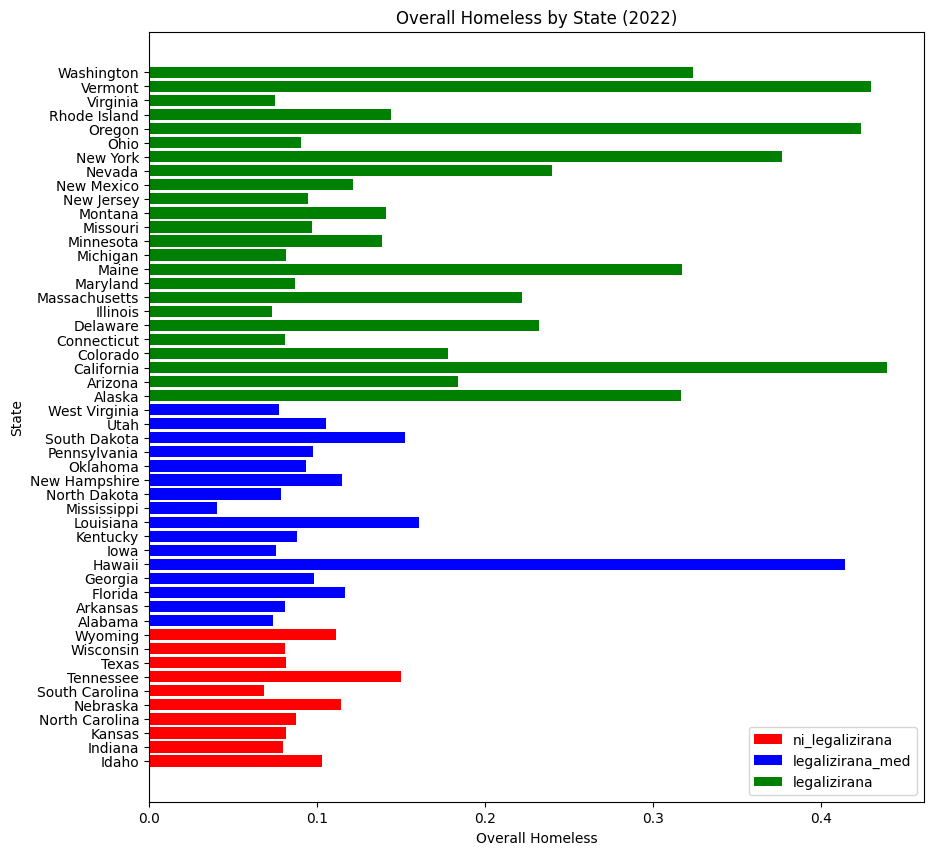

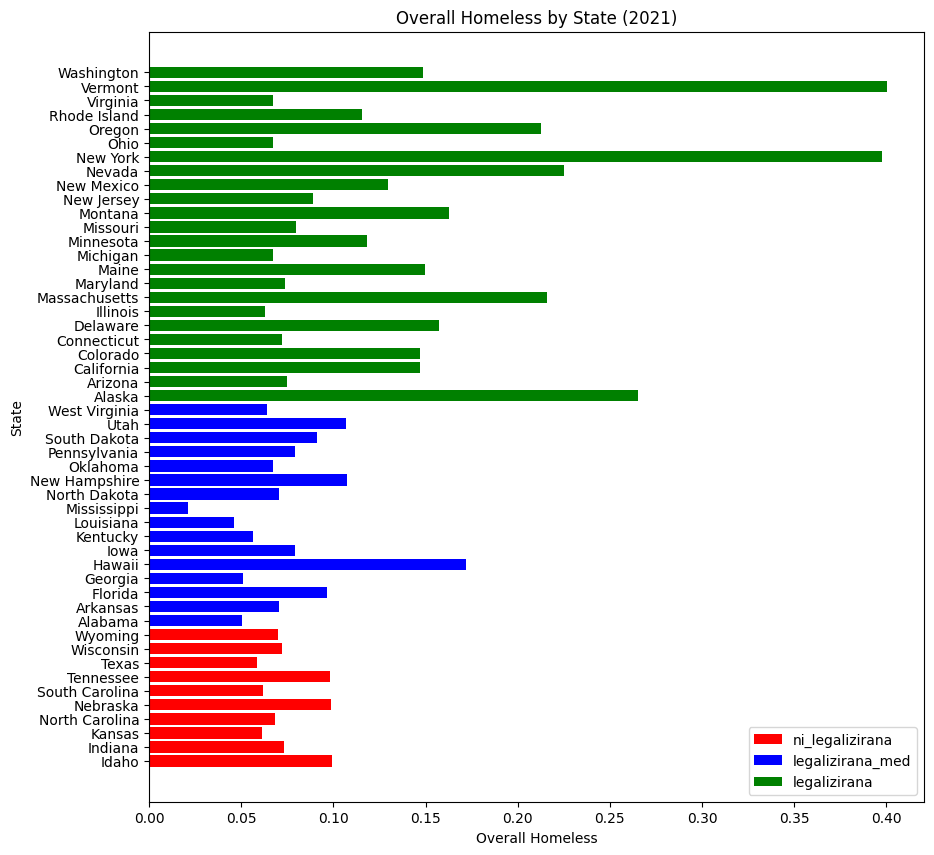

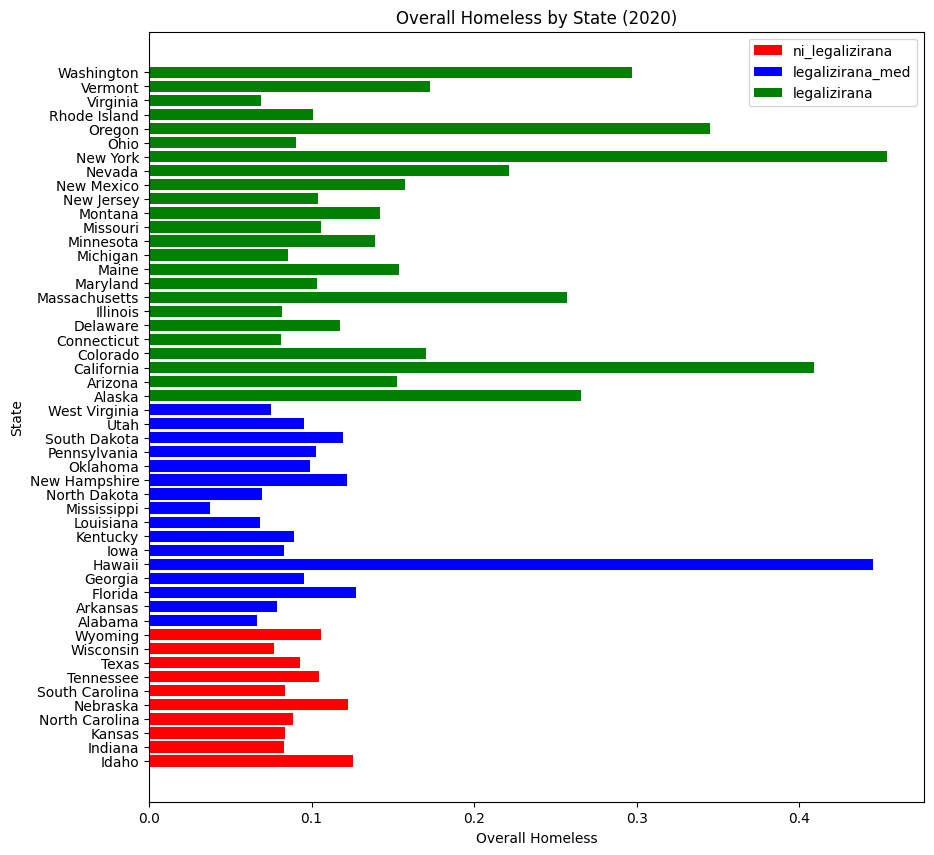

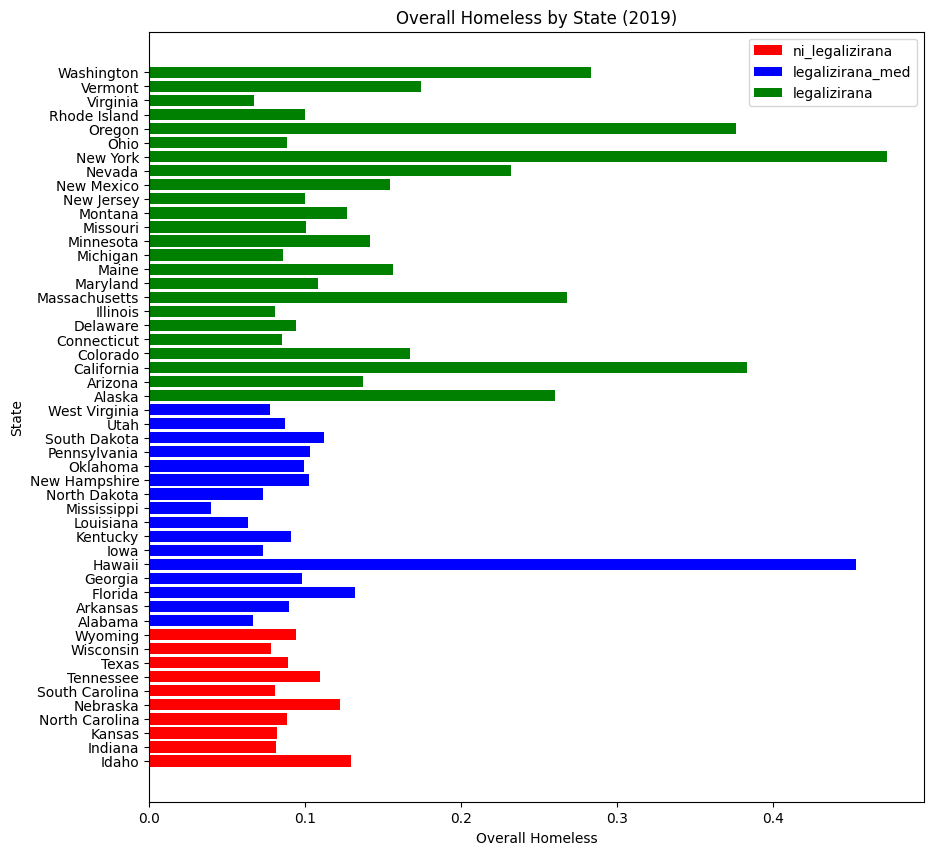

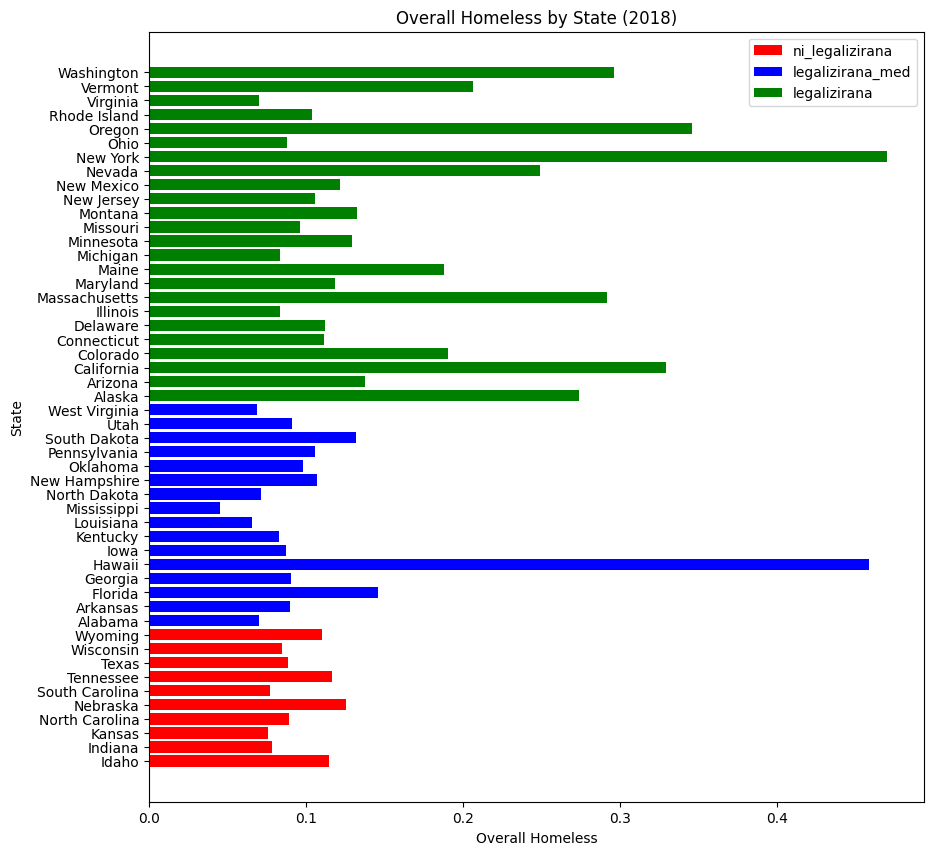

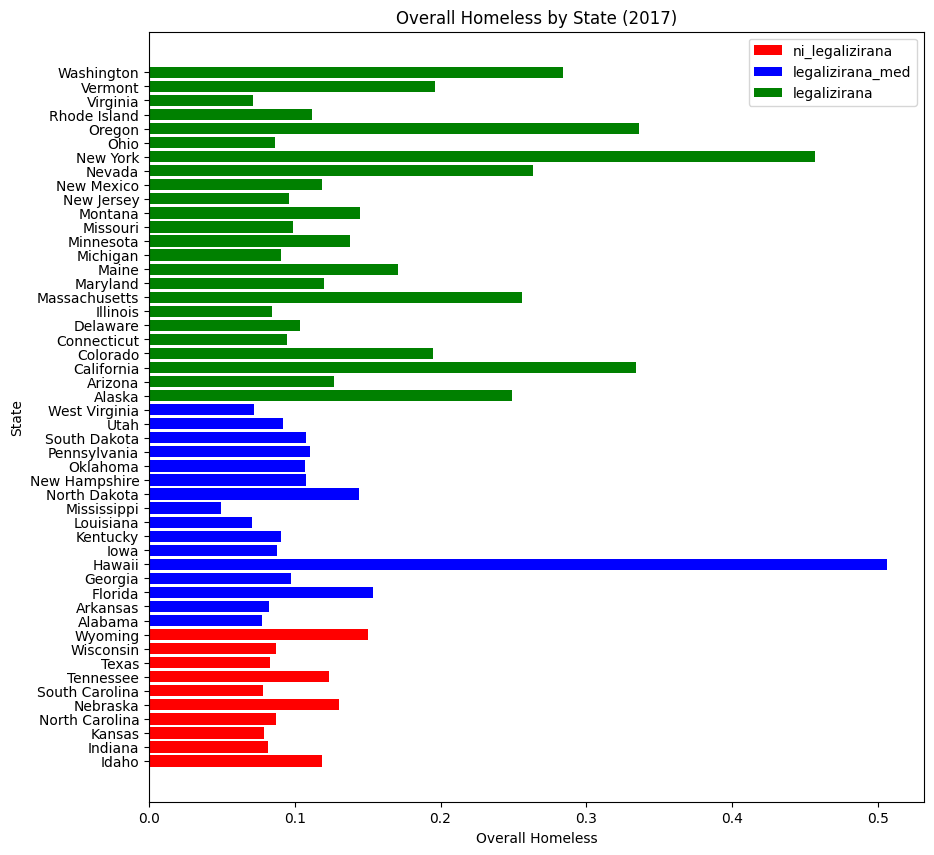

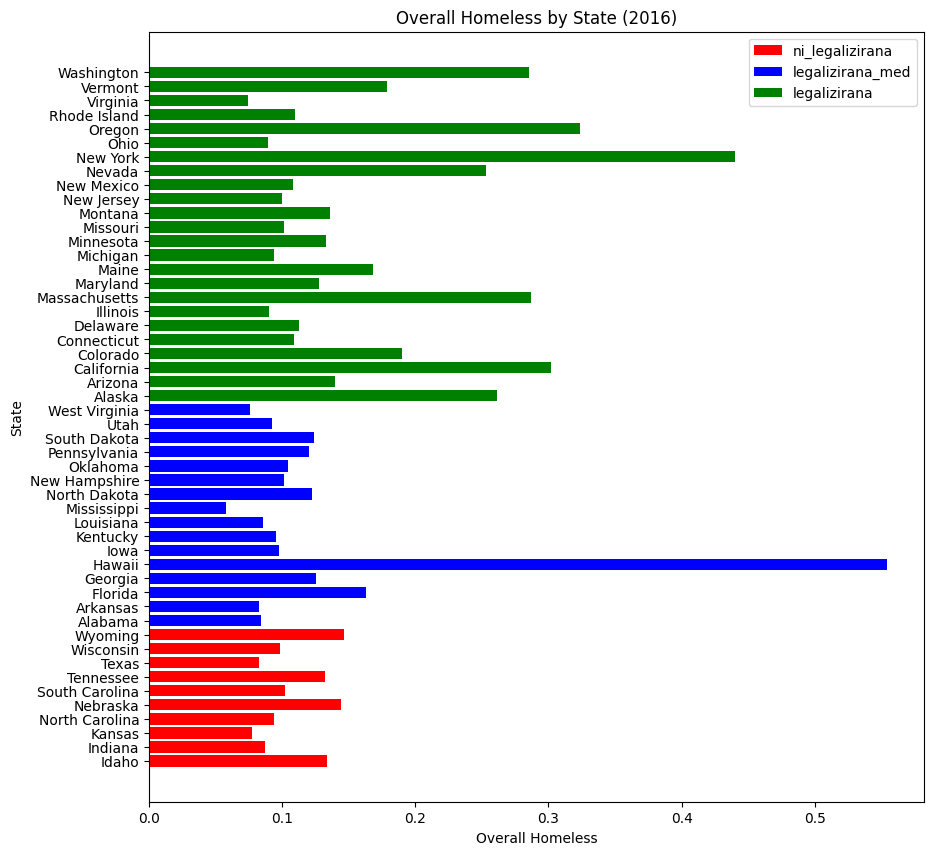

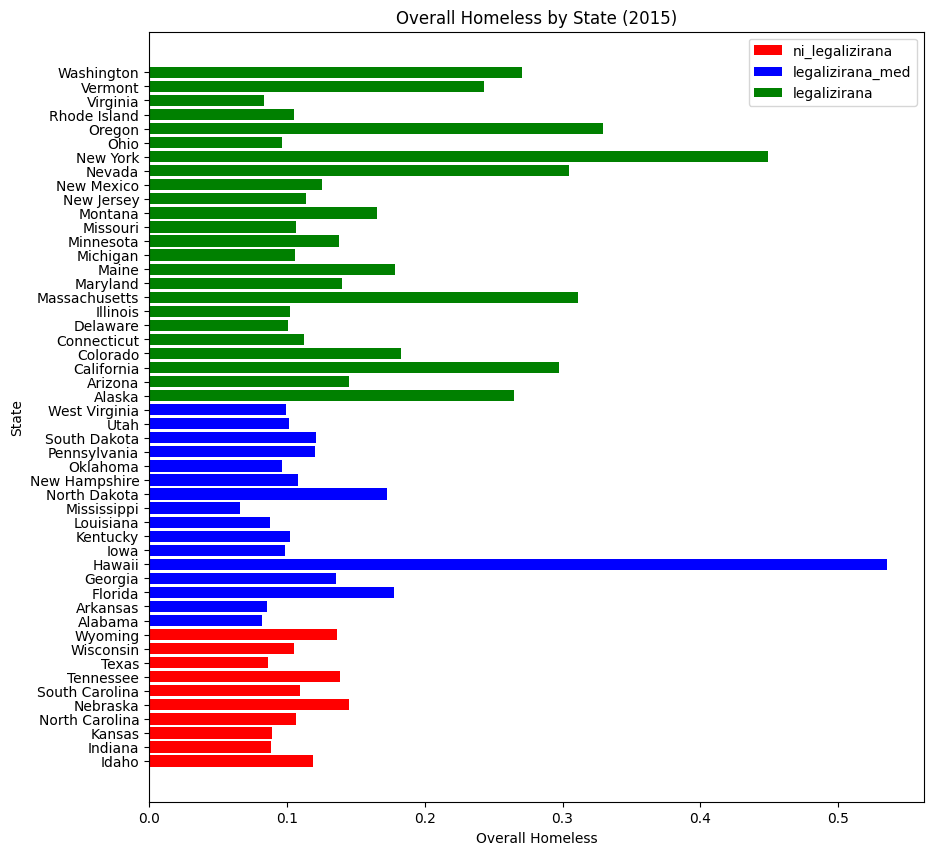

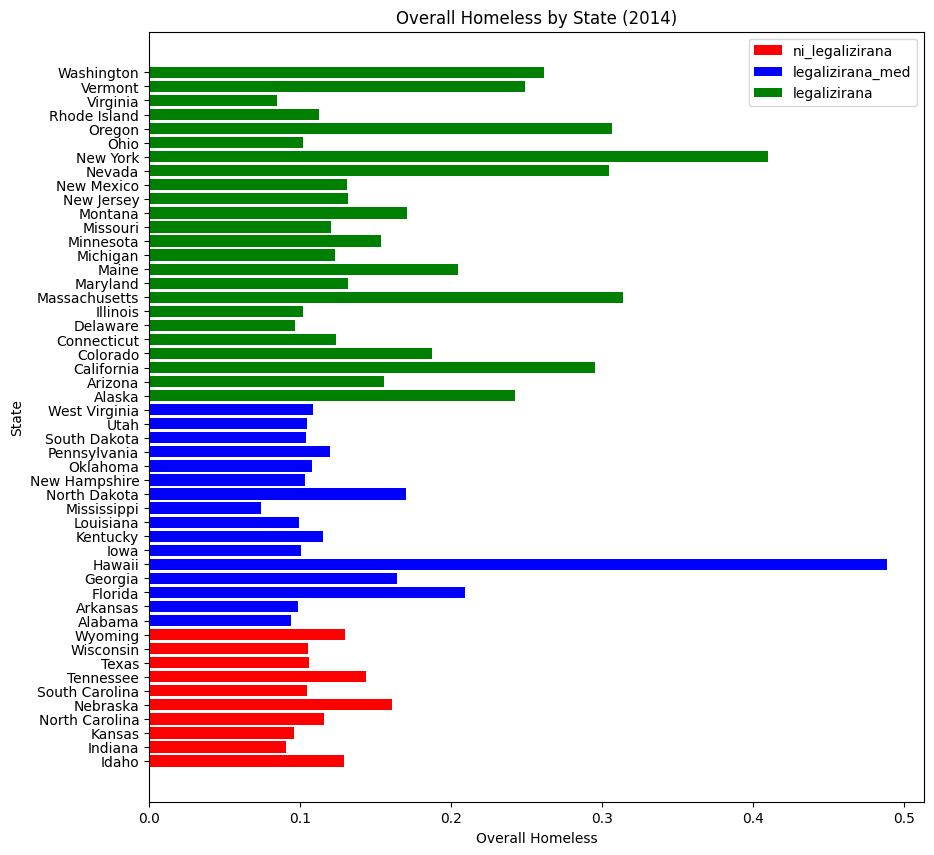

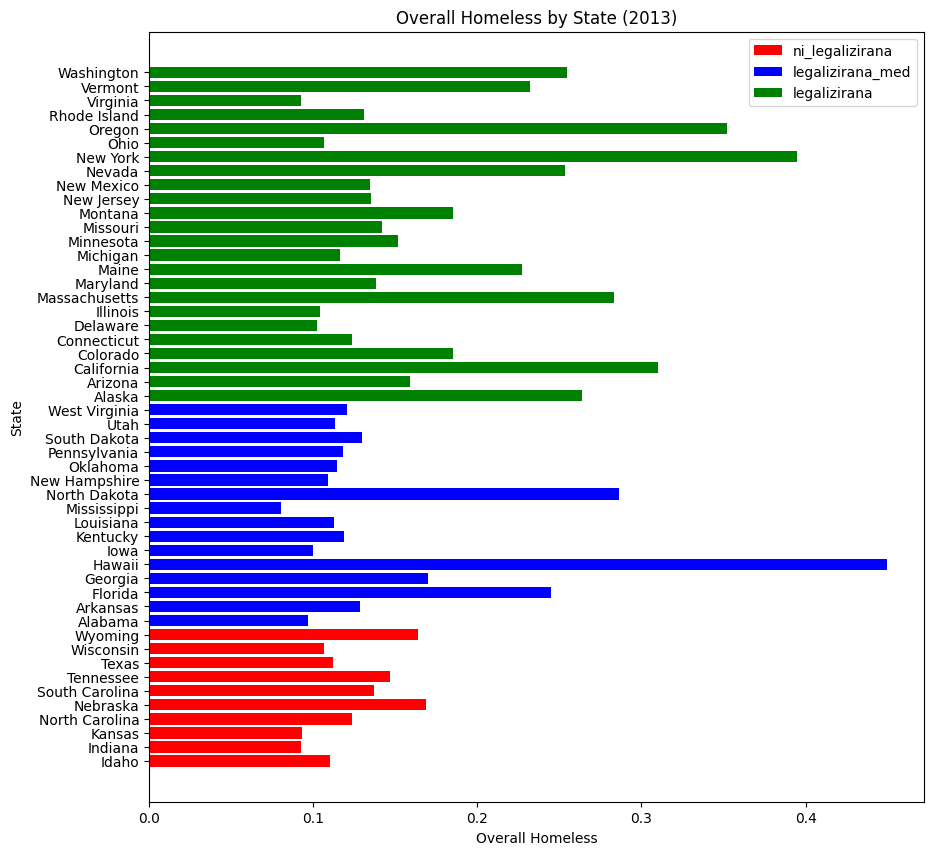

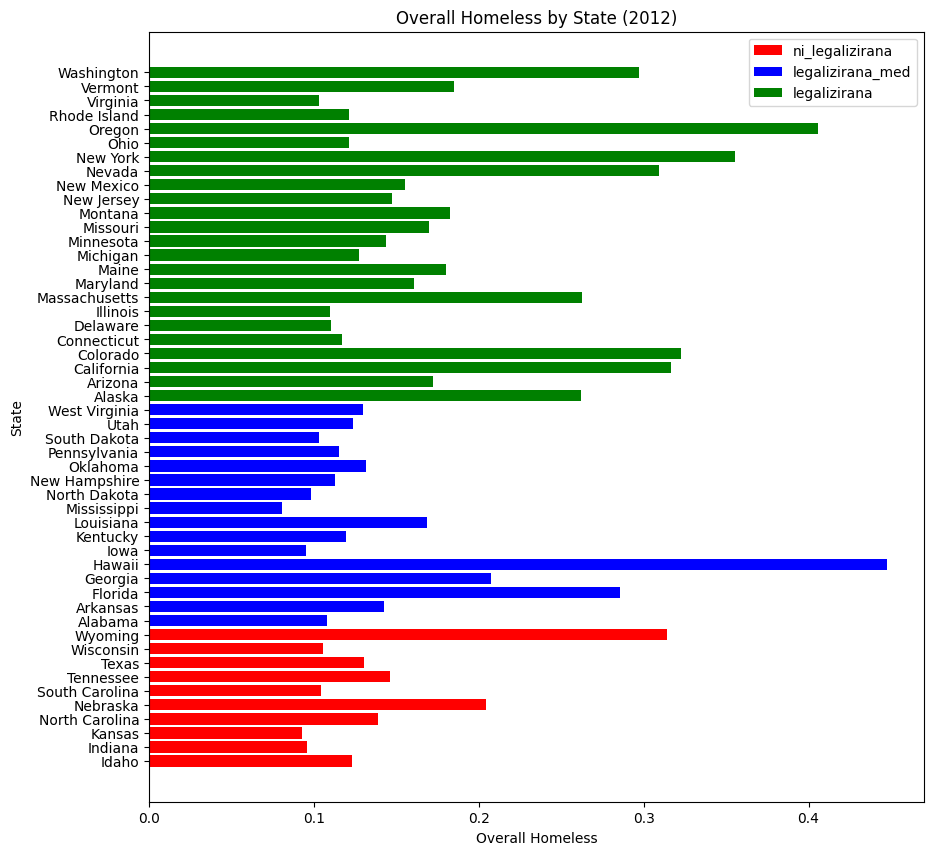

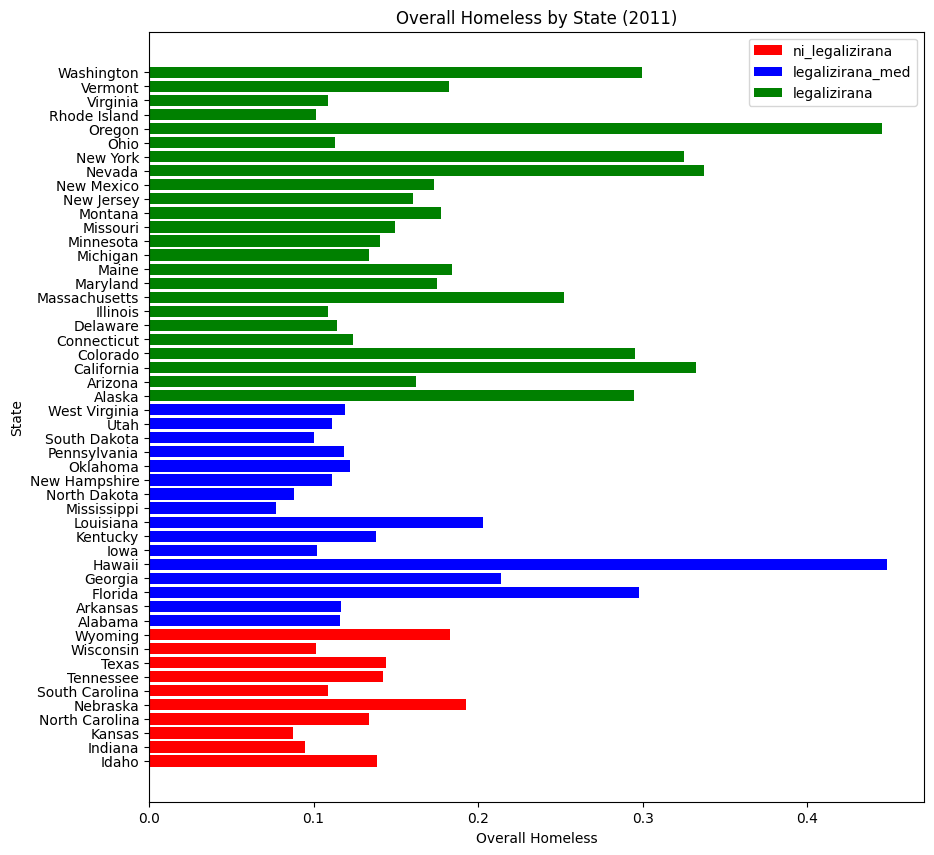

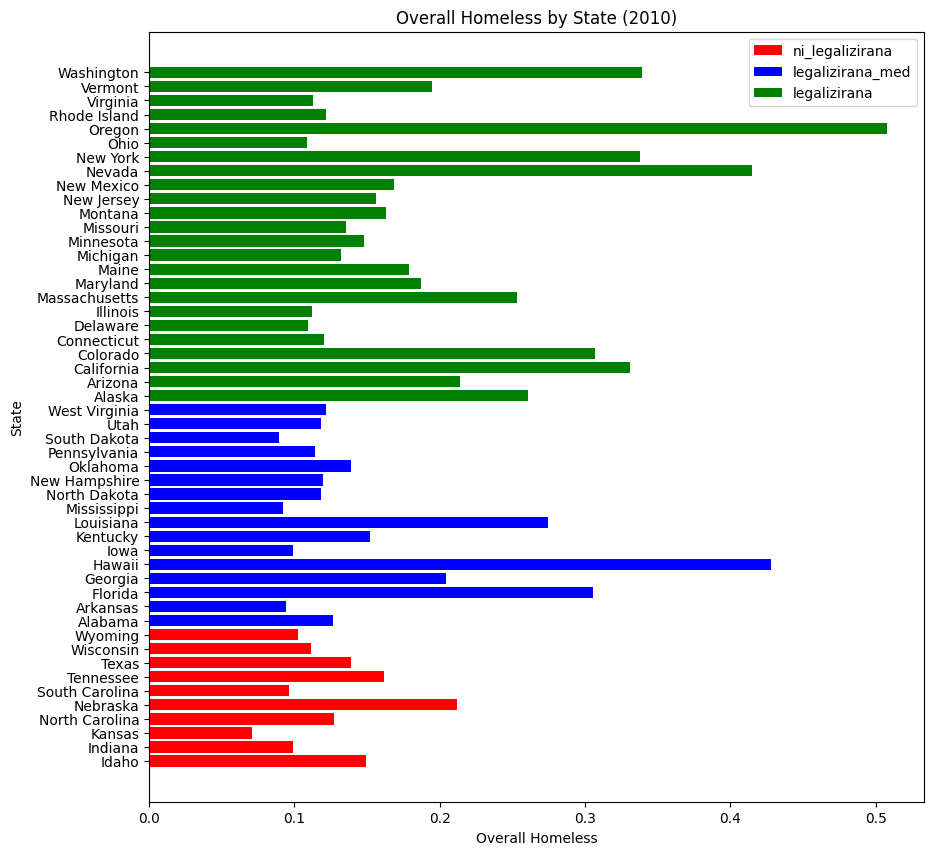

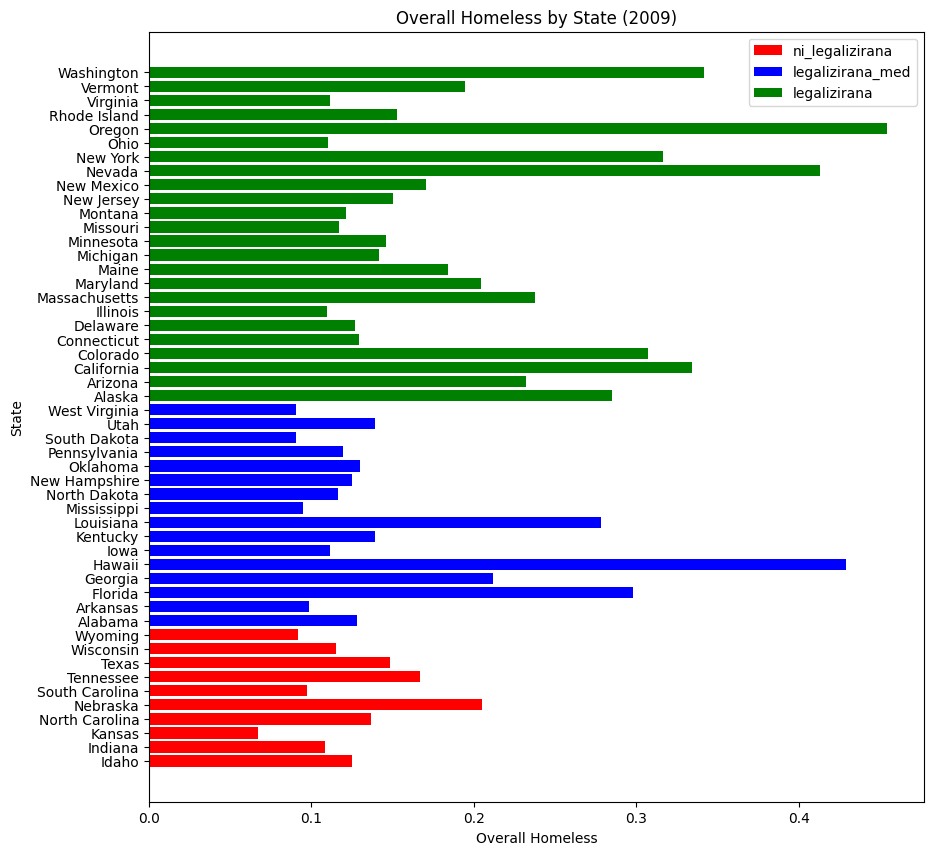

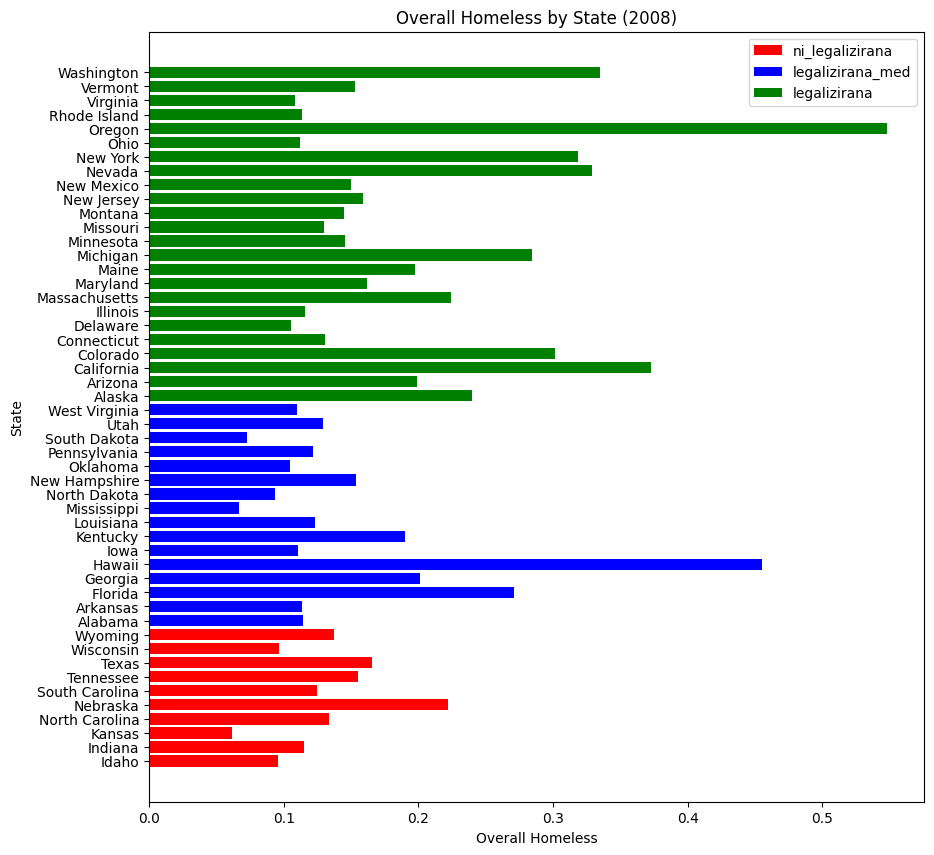

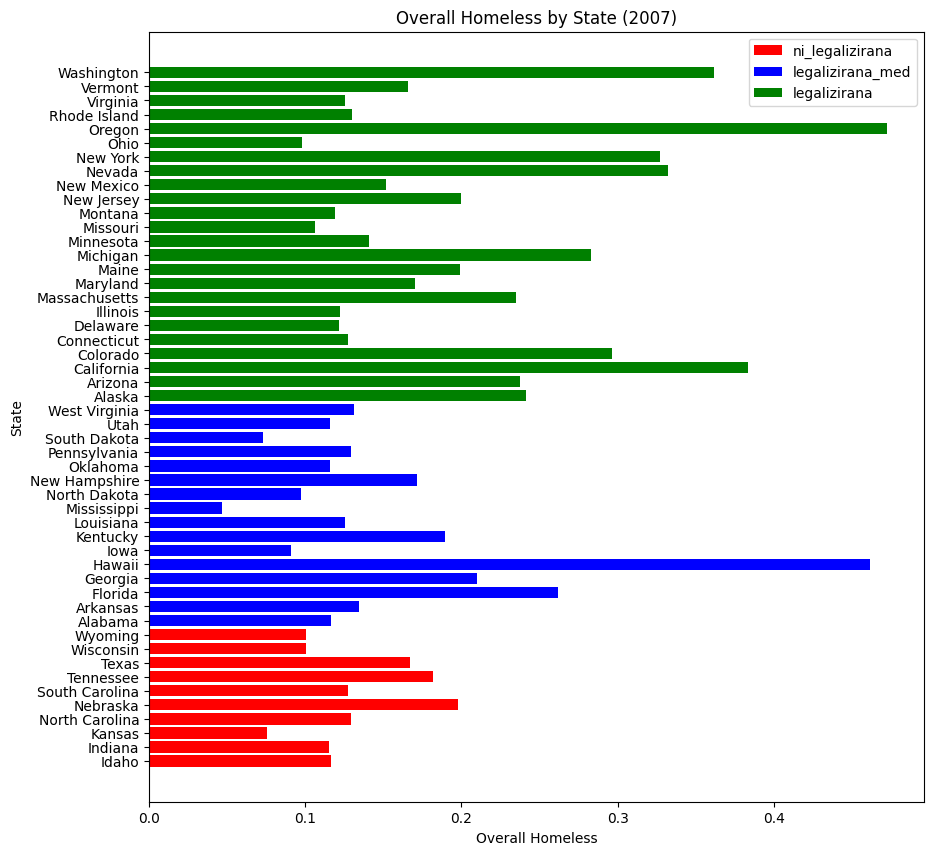

In [45]:
import matplotlib.pyplot as plt

# Barve za različne kategorije
cmap = {
    'legalizirana': 'green',
    'legalizirana_med': 'blue',
    'legalizirana_rec': 'yellow',
    'ni_legalizirana': 'red'
}

def plot_graph(year):
    data = dict_homeless[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    # Razdeli podatke glede na kategorije in nato nariši stolpce
    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], color=cmap[category])

    plt.xlabel('Overall Homeless')
    plt.ylabel('State')
    plt.title(f'Overall Homeless by State ({year})')
    plt.legend(unique_categories)
    plt.show()

# Prikaži graf za vsako leto
for year in dict_homeless.keys():
    plot_graph(year)



Percentage of homeless by category: -  Year: 2022
legalizirana: 4.91%
legalizirana_med: 1.87%
ni_legalizirana: 0.96%


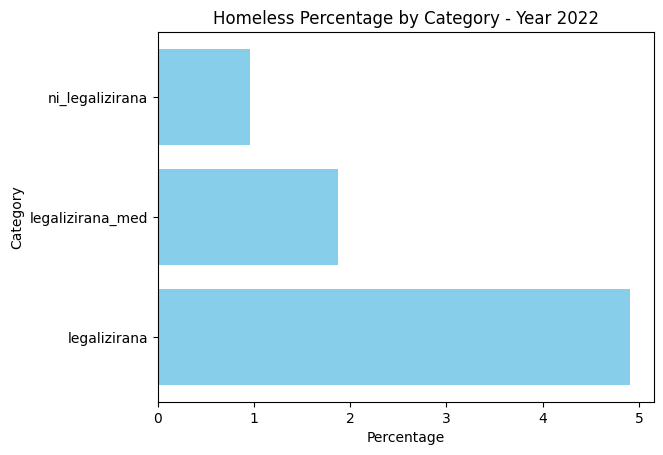



Percentage of homeless by category: -  Year: 2021
legalizirana: 3.65%
legalizirana_med: 1.23%
ni_legalizirana: 0.76%


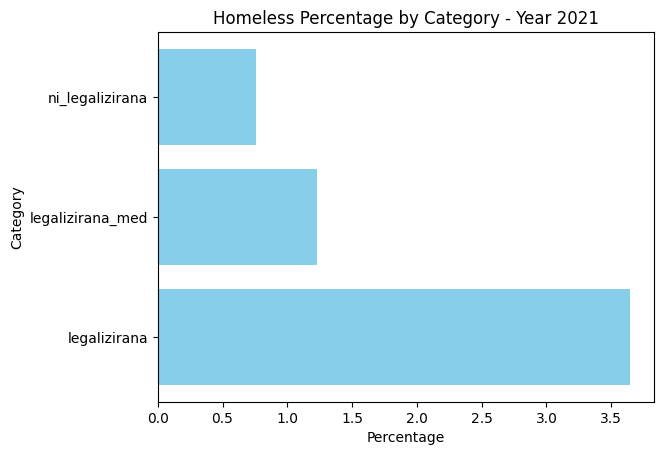



Percentage of homeless by category: -  Year: 2020
legalizirana: 4.28%
legalizirana_med: 1.77%
ni_legalizirana: 0.97%


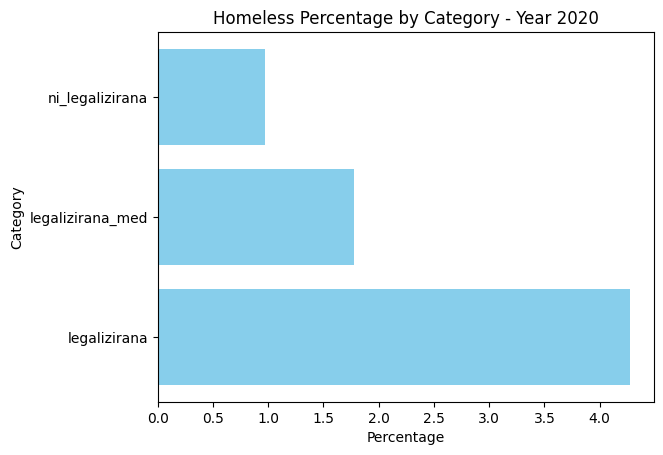



Percentage of homeless by category: -  Year: 2019
legalizirana: 4.24%
legalizirana_med: 1.76%
ni_legalizirana: 0.96%


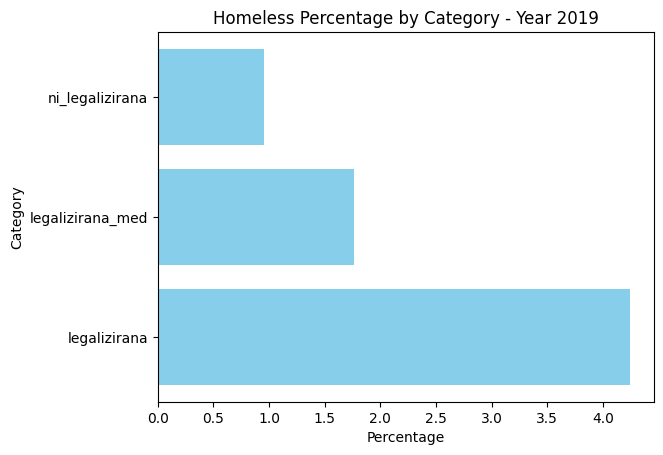



Percentage of homeless by category: -  Year: 2018
legalizirana: 4.33%
legalizirana_med: 1.81%
ni_legalizirana: 0.96%


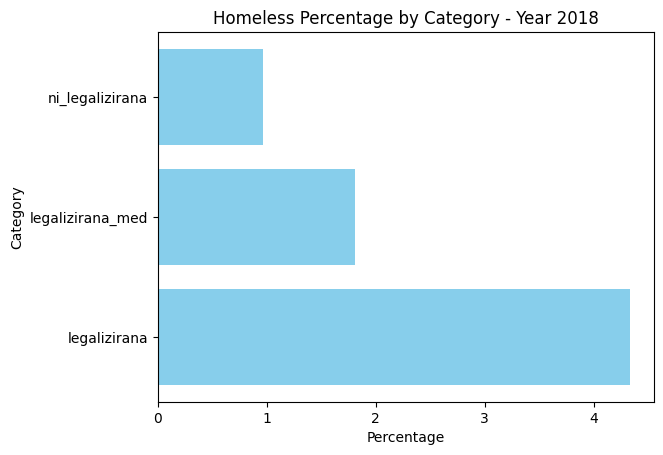



Percentage of homeless by category: -  Year: 2017
legalizirana: 4.23%
legalizirana_med: 1.96%
ni_legalizirana: 1.02%


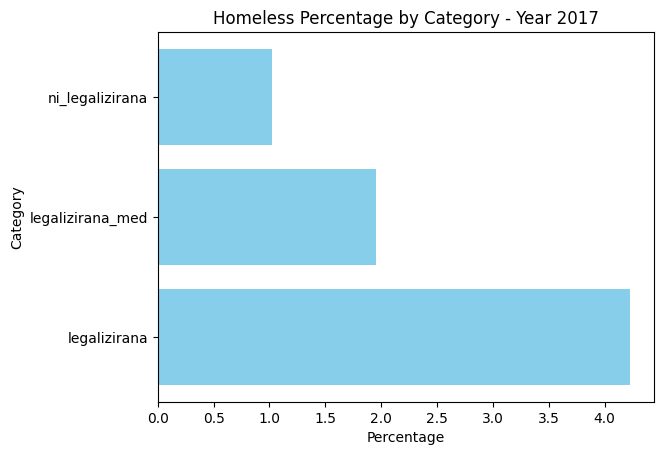



Percentage of homeless by category: -  Year: 2016
legalizirana: 4.22%
legalizirana_med: 2.09%
ni_legalizirana: 1.10%


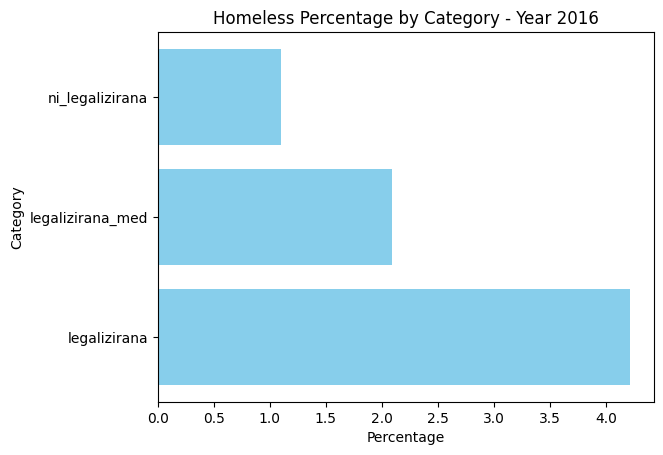



Percentage of homeless by category: -  Year: 2015
legalizirana: 4.47%
legalizirana_med: 2.19%
ni_legalizirana: 1.12%


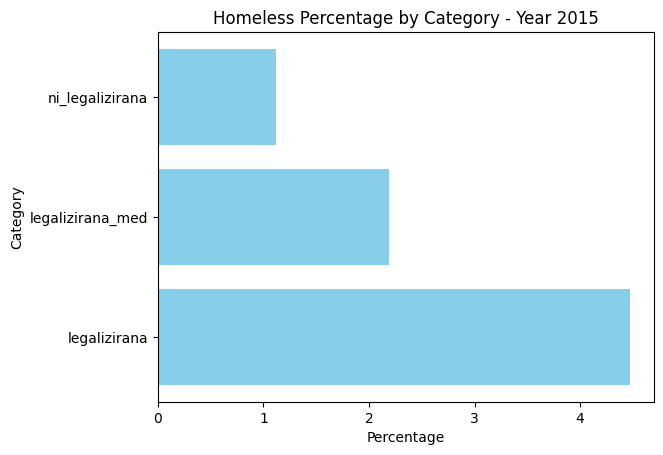



Percentage of homeless by category: -  Year: 2014
legalizirana: 4.51%
legalizirana_med: 2.26%
ni_legalizirana: 1.18%


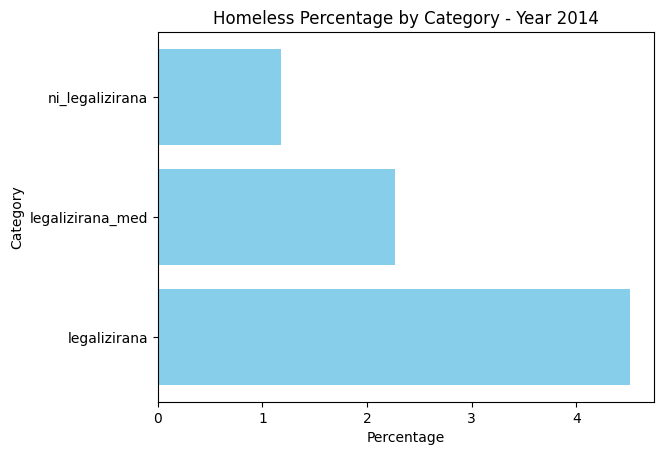



Percentage of homeless by category: -  Year: 2013
legalizirana: 4.58%
legalizirana_med: 2.49%
ni_legalizirana: 1.25%


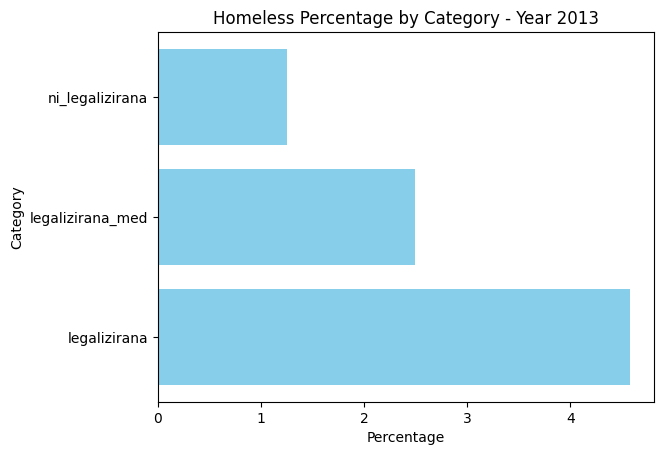



Percentage of homeless by category: -  Year: 2012
legalizirana: 4.84%
legalizirana_med: 2.47%
ni_legalizirana: 1.46%


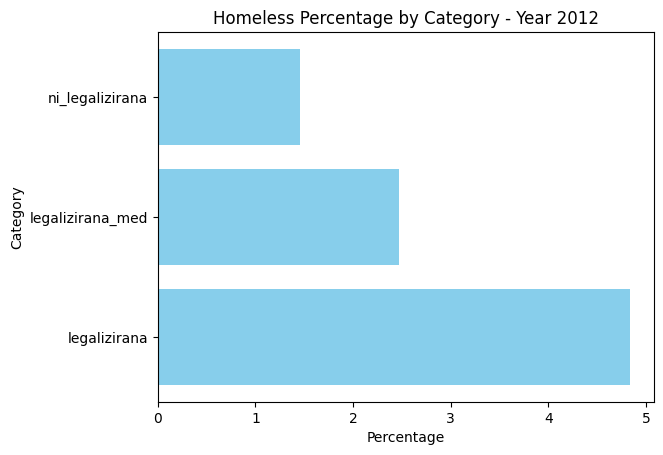



Percentage of homeless by category: -  Year: 2011
legalizirana: 4.89%
legalizirana_med: 2.48%
ni_legalizirana: 1.33%


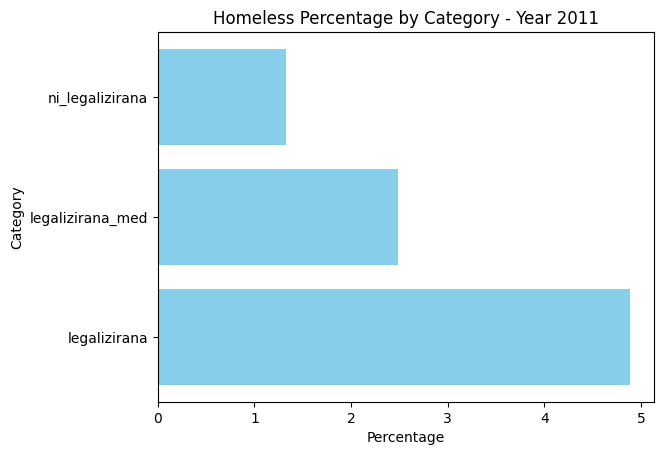



Percentage of homeless by category: -  Year: 2010
legalizirana: 5.12%
legalizirana_med: 2.60%
ni_legalizirana: 1.27%


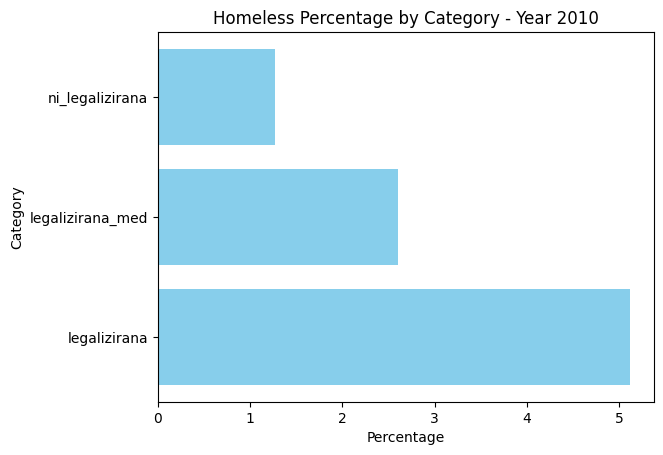



Percentage of homeless by category: -  Year: 2009
legalizirana: 5.09%
legalizirana_med: 2.60%
ni_legalizirana: 1.26%


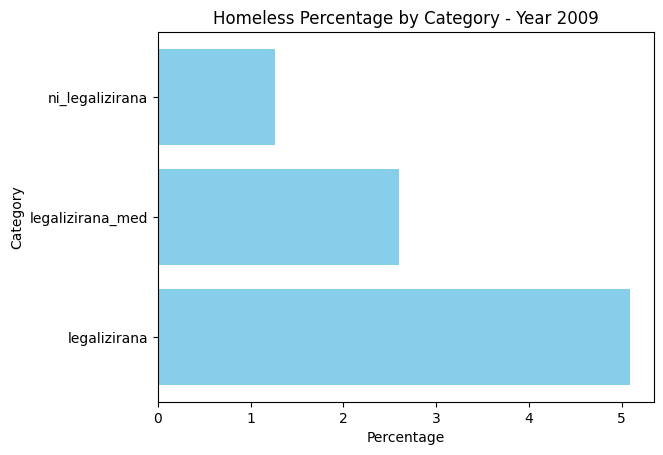



Percentage of homeless by category: -  Year: 2008
legalizirana: 5.08%
legalizirana_med: 2.43%
ni_legalizirana: 1.31%


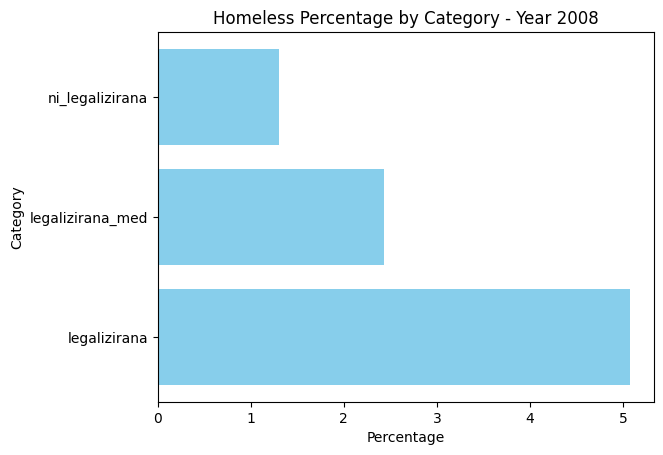



Percentage of homeless by category: -  Year: 2007
legalizirana: 5.15%
legalizirana_med: 2.47%
ni_legalizirana: 1.31%


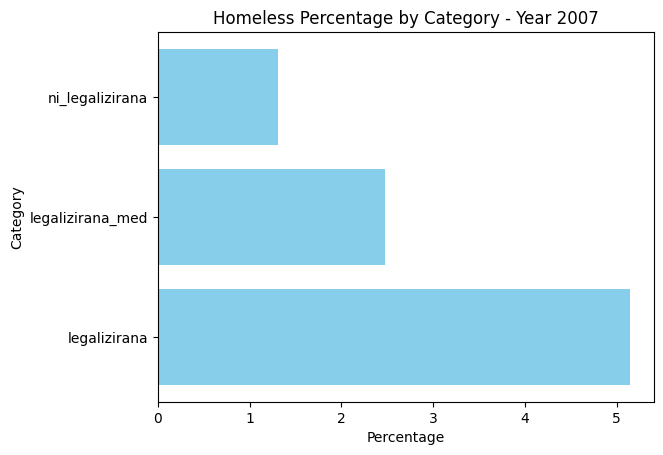

In [44]:
for year, data_list in dict_homeless.items():
    categories = {}
    for data in data_list:
        state_name, percentage, category = data
        if category not in categories:
            categories[category] = 0
        categories[category] += percentage
        
    print("\nPercentage of homeless by category: - ", f"Year: {year}")
    for category, percentage in categories.items():
        print(f"{category}: {percentage:.2f}%")
    
    # Create a bar chart
    plt.barh(list(categories.keys()), list(categories.values()), color='skyblue')
    plt.title(f"Homeless Percentage by Category - Year {year}")
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.show()
    print()